In [15]:
%run clean_data.ipynb

<class 'pandas.core.frame.DataFrame'>
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Fare', u'Embarked', u'sex_recoded', u'embarked_C',
       u'embarked_Q', u'embarked_S', u'pclass_1', u'pclass_2', u'pclass_3',
       u'male_child'],
      dtype='object')
Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Fare', u'Embarked', u'sex_recoded', u'embarked_C', u'embarked_Q',
       u'embarked_S', u'pclass_1', u'pclass_2', u'pclass_3', u'male_child'],
      dtype='object')


In [16]:
# let's explore each attribute

print titanic_train.groupby('Embarked').Survived.mean()
print titanic_train.groupby('Pclass').Survived.mean()
print titanic_train.groupby('Sex').Survived.mean()
print titanic_train.groupby('SibSp').Survived.mean()
print titanic_train.groupby('Parch').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


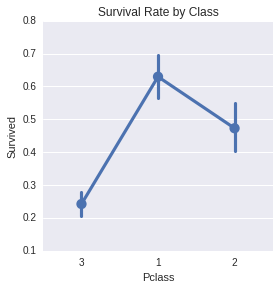

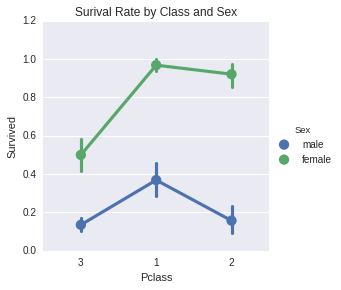

In [17]:
%matplotlib inline
import seaborn as sns

plt1 = sns.factorplot(data=titanic_train,x="Pclass",y="Survived")
sns.plt.title('Survival Rate by Class')
plt2 = sns.factorplot(data=titanic_train,x="Pclass",y="Survived",hue="Sex")
sns.plt.title('Surival Rate by Class and Sex')
sns.plt.show()

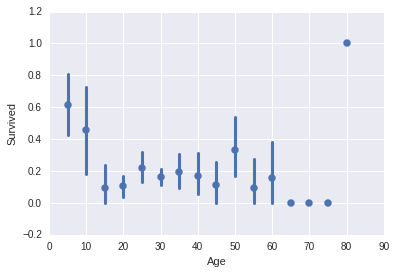

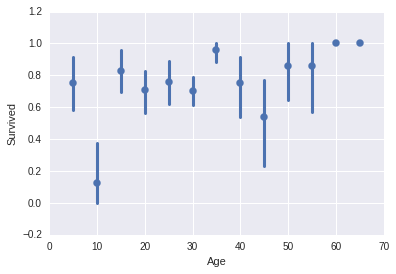

In [18]:
import numpy as np

sns.regplot(x='Age',y='Survived',data=titanic_train[titanic_train.Sex=='male'],x_bins=np.arange(5,100,5),fit_reg=False)
sns.plt.show()
sns.regplot(x='Age',y='Survived',data=titanic_train[titanic_train.Sex=='female'],x_bins=np.arange(5,100,5),fit_reg=False)
sns.plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

features = ['sex_recoded']

model = LogisticRegression()
model.fit(titanic_train[features],titanic_train.Survived)
predictions = model.predict(titanic_test[features])

kaggle_submission = titanic_test[['PassengerId']]
kaggle_submission = pd.DataFrame(index=titanic_test.PassengerId,data={'Survived':predictions})

kaggle_submission.to_csv('simple_gender_model.csv') # this scores .7655 (would be nice to be able to estimate this)

In [20]:
from sklearn.cross_validation import cross_val_score

features = ['sex_recoded']
print cross_val_score(model, titanic_train[features], titanic_train.Survived).mean()
features = ['sex_recoded','pclass_1','pclass_2','pclass_3','male_child']
print cross_val_score(model, titanic_train[features], titanic_train.Survived).mean()

model.fit(titanic_train[features],titanic_train.Survived)
predictions = model.predict(titanic_test[features])

kaggle_submission = titanic_test[['PassengerId']]
kaggle_submission = pd.DataFrame(index=titanic_test.PassengerId,data={'Survived':predictions})

kaggle_submission.to_csv('fair_gender_child.csv') # this scores .7655 (would be nice to be able to estimate this)

0.786756453423
0.799102132435
